C:\Users\Ayesha\AppData\Local\Temp\ipykernel_11880\939472184.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='label', palette='viridis')


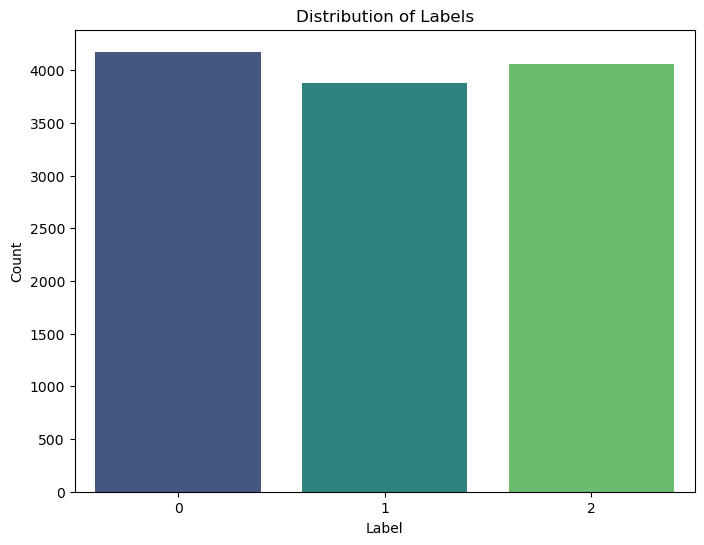

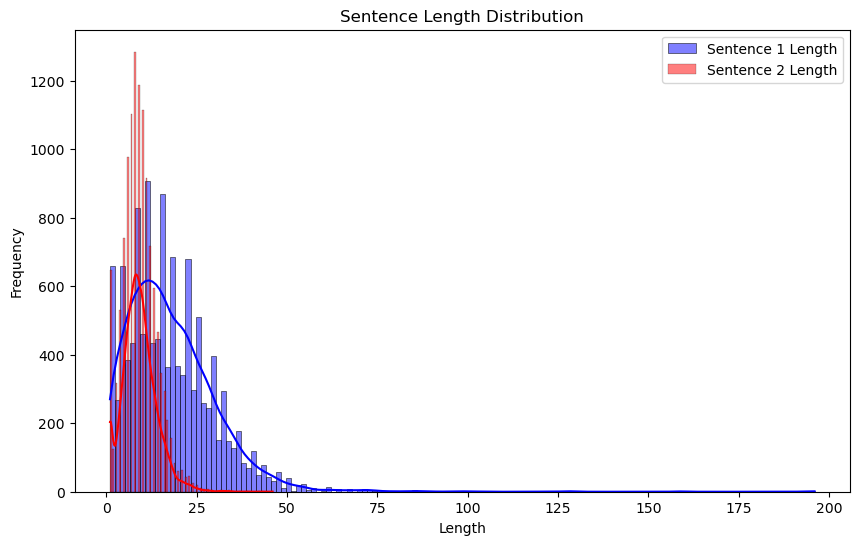

Missing Values in the dataset: id               0
premise          0
hypothesis       0
lang_abv         0
language         0
label            0
sentence1_len    0
sentence2_len    0
dtype: int64
Class distribution:
 label
0    4176
2    4064
1    3880
Name: count, dtype: int64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
train_df = pd.read_csv('train.csv')

# Visualize the distribution of labels
plt.figure(figsize=(8,6))
sns.countplot(data=train_df, x='label', palette='viridis')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Analyze sentence length distribution
train_df['sentence1_len'] = train_df['premise'].apply(lambda x: len(x.split()))
train_df['sentence2_len'] = train_df['hypothesis'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10,6))
sns.histplot(train_df['sentence1_len'], kde=True, color='blue', label='Sentence 1 Length')
sns.histplot(train_df['sentence2_len'], kde=True, color='red', label='Sentence 2 Length')
plt.legend()
plt.title('Sentence Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

# Check for missing values
missing_values = train_df.isnull().sum()
print("Missing Values in the dataset:", missing_values)

# Check for class balance
print("Class distribution:\n", train_df['label'].value_counts())


In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Download required NLTK packages
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Text Preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize and remove stop words
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    
    # Lemmatize words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return " ".join(tokens)

# Apply preprocessing to both sentences
train_df['sentence1_clean'] = train_df['premise'].apply(preprocess_text)
train_df['sentence2_clean'] = train_df['hypothesis'].apply(preprocess_text)

# Feature Extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X1 = tfidf.fit_transform(train_df['sentence1_clean']).toarray()
X2 = tfidf.transform(train_df['sentence2_clean']).toarray()

# Combine the features of both sentences into one array
import numpy as np
X = np.concatenate((X1, X2), axis=1)
# Target variable
y = train_df['label']


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report


In [7]:
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Download required NLTK packages
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [15]:
# Text Preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize and remove stop words
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    
    # Lemmatize words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return " ".join(tokens)

In [13]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

ModuleNotFoundError: No module named 'tokenizer'

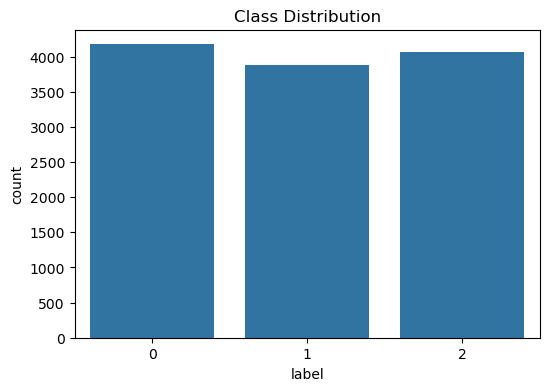

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


NameError: name 'Tokenizer' is not defined

In [11]:
# Load dataset
train_df = pd.read_csv("train.csv")

# Exploratory Data Analysis
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=train_df)
plt.title("Class Distribution")
plt.show()

# Text Preprocessing
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if pd.isna(text):  # Handle missing values
        return ""
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

train_df['sentence1'] = train_df['premise'].apply(preprocess_text)
train_df['sentence2'] = train_df['hypothesis'].apply(preprocess_text)

# Combine sentences for input processing
train_df['combined_text'] = train_df['sentence1'] + " " + train_df['sentence2']

# Tokenization and Sequence Padding
max_words = 20000  # Maximum number of words in vocabulary
max_length = 100  # Maximum sequence length

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['combined_text'])
X = tokenizer.texts_to_sequences(train_df['combined_text'])
X = pad_sequences(X, maxlen=max_length, padding='post', truncating='post')
y = train_df['label'].values

# Split Data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Build LSTM/GRU Model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_length),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(GRU(64)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # Output layer with 3 classes
])

# Compile Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate Model
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Accuracy:", accuracy_score(y_val, y_pred_classes))
print("Classification Report:\n", classification_report(y_val, y_pred_classes))

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("LSTM/GRU Model Training and Evaluation Complete!")

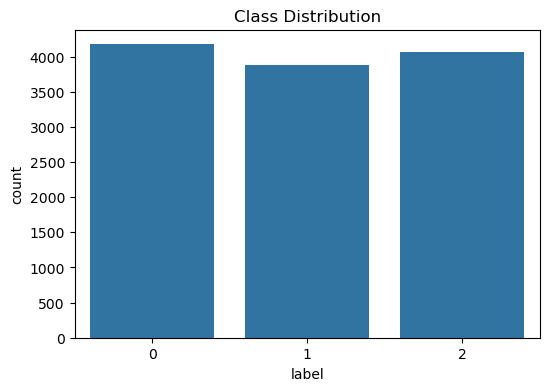

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Epoch 1/10


C:\Users\Ayesha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


303/303 ━━━━━━━━━━━━━━━━━━━━ 39s 106ms/step - accuracy: 0.3351 - loss: 1.1008 - val_accuracy: 0.3511 - val_loss: 1.0981
Epoch 2/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 31s 102ms/step - accuracy: 0.3619 - loss: 1.0952 - val_accuracy: 0.3548 - val_loss: 1.0997
Epoch 3/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 31s 104ms/step - accuracy: 0.4114 - loss: 1.0806 - val_accuracy: 0.2632 - val_loss: 1.2027
Epoch 4/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 30s 100ms/step - accuracy: 0.5337 - loss: 0.9172 - val_accuracy: 0.2434 - val_loss: 1.4322
Epoch 5/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 31s 103ms/step - accuracy: 0.6145 - loss: 0.7538 - val_accuracy: 0.2294 - val_loss: 1.8950
Epoch 6/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 31s 102ms/step - accuracy: 0.6682 - loss: 0.6314 - val_accuracy: 0.2413 - val_loss: 2.5440
Epoch 7/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 31s 102ms/step - accuracy: 0.7187 - loss: 0.5365 - val_accuracy: 0.2397 - val_loss: 3.2004
Epoch 8/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 31s 101ms/step - accuracy: 0.7433 - loss: 0.4810 - val

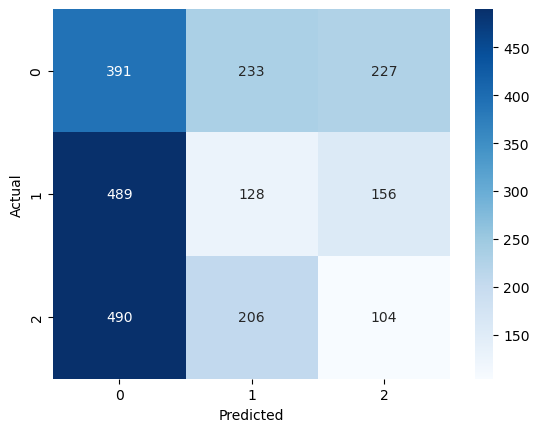

LSTM/GRU Model Training and Evaluation Complete!


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, GRU, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load dataset
train_df = pd.read_csv("train.csv")

# Exploratory Data Analysis
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=train_df)
plt.title("Class Distribution")
plt.show()

# Text Preprocessing
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if pd.isna(text):  # Handle missing values
        return ""
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

train_df['sentence1'] = train_df['premise'].apply(preprocess_text)
train_df['sentence2'] = train_df['hypothesis'].apply(preprocess_text)

# Combine sentences for input processing
train_df['combined_text'] = train_df['sentence1'] + " " + train_df['sentence2']

# Tokenization and Sequence Padding
max_words = 20000  # Maximum number of words in vocabulary
max_length = 100  # Maximum sequence length

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['combined_text'])
X = tokenizer.texts_to_sequences(train_df['combined_text'])
X = pad_sequences(X, maxlen=max_length, padding='post', truncating='post')
y = train_df['label'].values

# Split Data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Build LSTM/GRU Model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_length),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(GRU(64)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # Output layer with 3 classes
])

# Compile Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate Model
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Accuracy:", accuracy_score(y_val, y_pred_classes))
print("Classification Report:\n", classification_report(y_val, y_pred_classes))

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("LSTM/GRU Model Training and Evaluation Complete!")


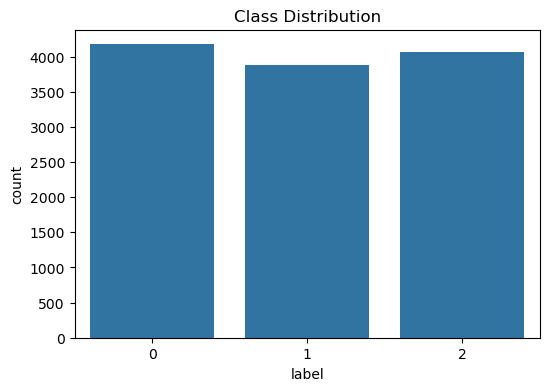

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Epoch 1/10


C:\Users\Ayesha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


303/303 ━━━━━━━━━━━━━━━━━━━━ 34s 94ms/step - accuracy: 0.3413 - loss: 1.0988 - val_accuracy: 0.3511 - val_loss: 1.0982
Epoch 2/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 32s 104ms/step - accuracy: 0.3504 - loss: 1.0979 - val_accuracy: 0.2983 - val_loss: 1.1019
Epoch 3/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 35s 116ms/step - accuracy: 0.4305 - loss: 1.0592 - val_accuracy: 0.2752 - val_loss: 1.1920
Epoch 4/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 31s 102ms/step - accuracy: 0.5153 - loss: 0.9192 - val_accuracy: 0.2562 - val_loss: 1.4778
Epoch 5/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 31s 102ms/step - accuracy: 0.5875 - loss: 0.7648 - val_accuracy: 0.2393 - val_loss: 2.1002
Epoch 6/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 31s 101ms/step - accuracy: 0.6259 - loss: 0.6764 - val_accuracy: 0.2261 - val_loss: 2.6168
Epoch 7/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 30s 100ms/step - accuracy: 0.6589 - loss: 0.6102 - val_accuracy: 0.2174 - val_loss: 3.1324
Epoch 8/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 31s 103ms/step - accuracy: 0.6903 - loss: 0.5471 - val_

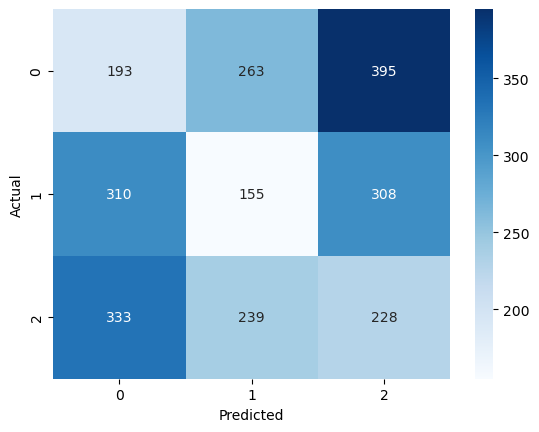

76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step


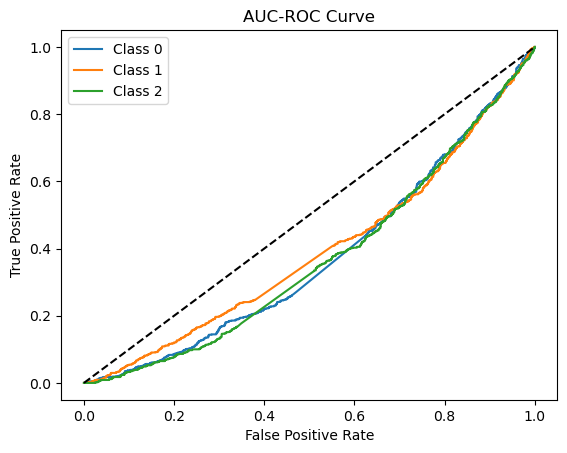

LSTM/GRU Model Training and Evaluation Complete!


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, GRU, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load dataset
train_df = pd.read_csv("train.csv")

# Exploratory Data Analysis
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=train_df)
plt.title("Class Distribution")
plt.show()

# Text Preprocessing
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if pd.isna(text):  # Handle missing values
        return ""
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

train_df['sentence1'] = train_df['premise'].apply(preprocess_text)
train_df['sentence2'] = train_df['hypothesis'].apply(preprocess_text)

# Combine sentences for input processing
train_df['combined_text'] = train_df['sentence1'] + " " + train_df['sentence2']

# Tokenization and Sequence Padding
max_words = 20000  # Maximum number of words in vocabulary
max_length = 100  # Maximum sequence length

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['combined_text'])
X = tokenizer.texts_to_sequences(train_df['combined_text'])
X = pad_sequences(X, maxlen=max_length, padding='post', truncating='post')
y = train_df['label'].values

# Split Data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Build LSTM/GRU Model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_length),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(GRU(64)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # Output layer with 3 classes
])

# Compile Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate Model
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Accuracy:", accuracy_score(y_val, y_pred_classes))
print("Classification Report:\n", classification_report(y_val, y_pred_classes))

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# AUC-ROC Curve
y_pred_prob = model.predict(X_val)
y_val_one_hot = tf.keras.utils.to_categorical(y_val, num_classes=3)

for i in range(3):
    fpr, tpr, _ = roc_curve(y_val_one_hot[:, i], y_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {i}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend()
plt.show()

print("LSTM/GRU Model Training and Evaluation Complete!")
